- Carica il dataset "Iris" utilizzando sklearn.datasets.load_iris().
- Considera tutte le quattro caratteristiche (lunghezza e larghezza di petali e petali) per il clustering.
- Applica l'algoritmo K-Means con un numero di cluster pari a 3.
- Visualizza i cluster ottenuti utilizzando tecniche di visualizzazione adeguate
(ad esempio, plot 2D delle prime due componenti principali).
- Confronta i cluster assegnati dall'algoritmo con le etichette reali delle
specie di iris.
- Calcola metriche di valutazione come l'Indice di Rand Adjusted o l'Homogeneity
- Score per quantificare la qualità del clustering.
- Discuta i risultati e l'eventuale corrispondenza tra i cluster e le specie
reali.

In [739]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [740]:
random_state = 42

In [741]:
iris = load_iris()

x = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [742]:
target_names,feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [743]:
df = pd.DataFrame(x, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [744]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=random_state
)

In [745]:
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [746]:
y_kmeans = kmeans.predict(x)

In [747]:
y_kmeans.shape, y_kmeans[:3]

((150,), array([1, 1, 1]))

In [748]:
y_kmeans[:3], y[:3]

(array([1, 1, 1]), array([0, 0, 0]))

In [749]:
centri = kmeans.cluster_centers_

df_centri = pd.DataFrame(centri, columns=feature_names)
df_centri

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


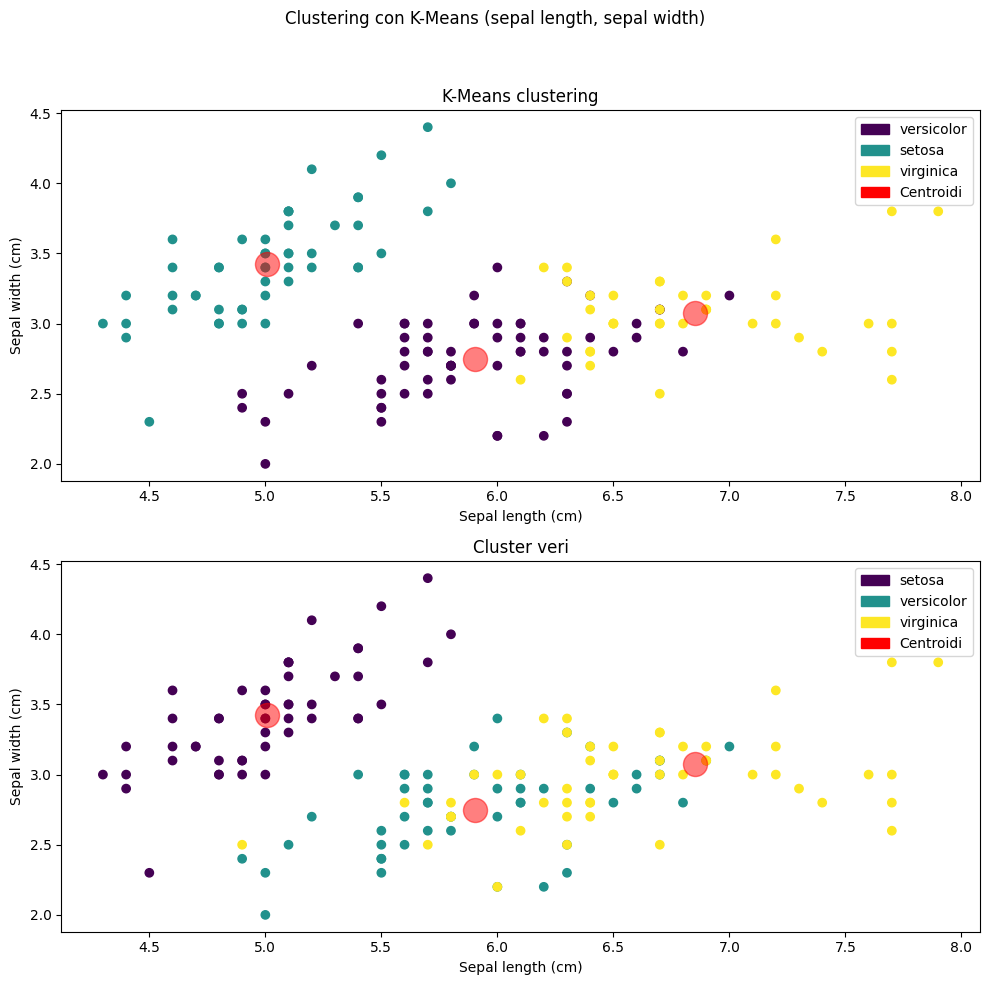

In [750]:
import matplotlib.patches as mpatches

# Creazione della figura e dei subplot
fig, axs = plt.subplots(2, figsize=(10, 10))

# Creazione di una colormap
cmap = plt.get_cmap("viridis", 3)  # Mappa con 3 colori

# Proxy per la legenda
cluster_colors = [cmap(i) for i in range(3)] # Colori per i cluster


target_names1 = target_names.copy()
temp = target_names1[1]
target_names1[1] = target_names1[0]
target_names1[0] = temp

legend_patches1 = [mpatches.Patch(color=cluster_colors[i], label=target_names1[i]) for i in range(3)]
legend_patches2 = [mpatches.Patch(color=cluster_colors[i], label=target_names[i]) for i in range(3)]

# Primo subplot (K-Means clustering)
scatter1 = axs[0].scatter(
    df['sepal length (cm)'], 
    df['sepal width (cm)'], 
    c=y_kmeans, 
    cmap=cmap
)
axs[0].scatter(
    df_centri['sepal length (cm)'], 
    df_centri['sepal width (cm)'], 
    c='red', 
    s=300, 
    alpha=0.5, 
    label="Centroidi"
)
axs[0].set_title("K-Means clustering")
axs[0].set_xlabel("Sepal length (cm)")
axs[0].set_ylabel("Sepal width (cm)")
axs[0].legend(handles=legend_patches1 + [mpatches.Patch(color='red', label='Centroidi')])

# Secondo subplot (Cluster veri)
scatter2 = axs[1].scatter(
    df['sepal length (cm)'], 
    df['sepal width (cm)'], 
    c=y, 
    cmap=cmap
)
axs[1].scatter(
    df_centri['sepal length (cm)'], 
    df_centri['sepal width (cm)'], 
    c='red', 
    s=300, 
    alpha=0.5, 
    label="Centroidi"
)
axs[1].set_title("Cluster veri")
axs[1].set_xlabel("Sepal length (cm)")
axs[1].set_ylabel("Sepal width (cm)")
axs[1].legend(handles=legend_patches2 + [mpatches.Patch(color='red', label='Centroidi')])

# Titolo generale della figura
fig.suptitle('Clustering con K-Means (sepal length, sepal width)')

# Miglioramento della spaziatura
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostra il grafico
plt.show()


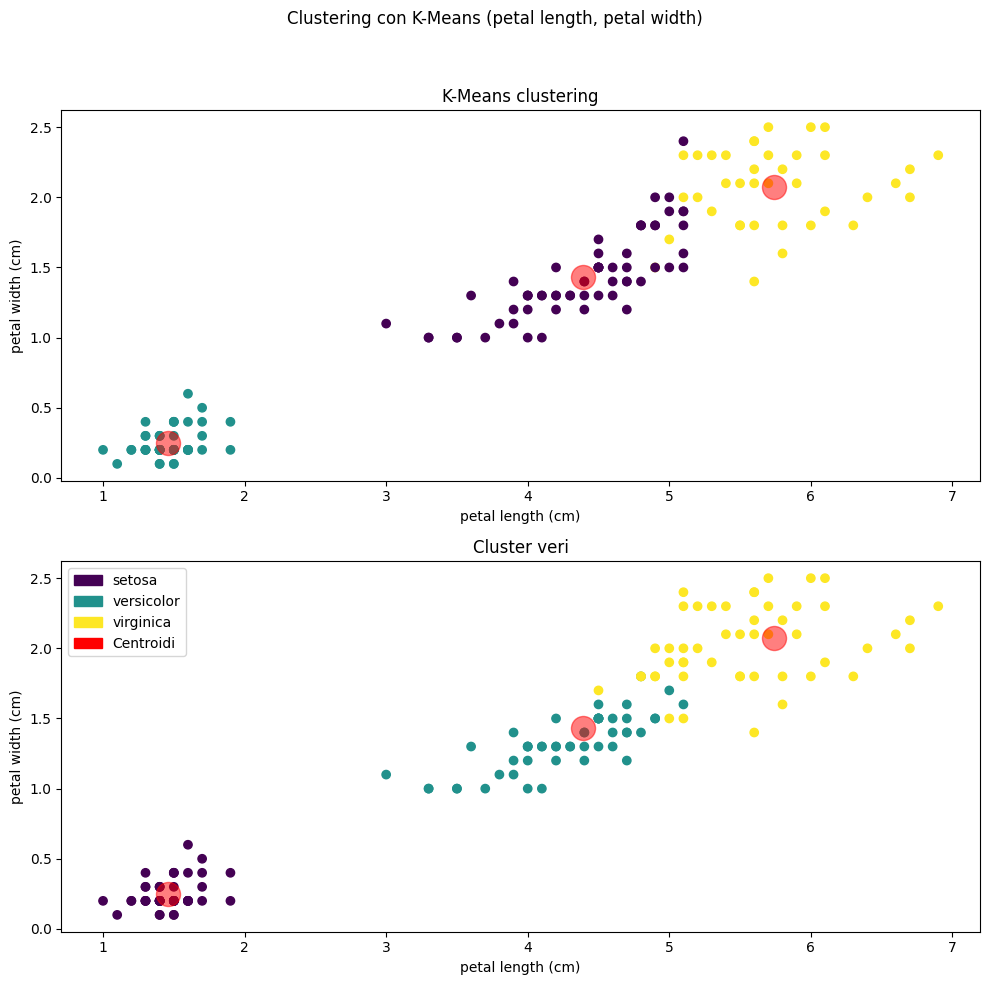

In [753]:
# Creazione della figura e dei subplot
fig, axs = plt.subplots(2, figsize=(10, 10))

# Creazione di una colormap
cmap = plt.get_cmap("viridis", 3)  # Mappa con 3 colori

# Proxy per la legenda
cluster_colors = [cmap(i) for i in range(3)]  # Colori per i cluster 0, 1, 2

legend_patches = [mpatches.Patch(color=cluster_colors[i], label=target_names[i]) for i in range(3)]

# Primo subplot (K-Means clustering)
scatter1 = axs[0].scatter(
    df['petal length (cm)'], 
    df['petal width (cm)'], 
    c=y_kmeans, 
    cmap=cmap
)
axs[0].scatter(
    df_centri['petal length (cm)'], 
    df_centri['petal width (cm)'], 
    c='red', 
    s=300, 
    alpha=0.5, 
    label="Centroidi"
)
axs[0].set_title("K-Means clustering")
axs[0].set_xlabel("petal length (cm)")
axs[0].set_ylabel("petal width (cm)")
# axs[0].legend(handles=legend_patches + [mpatches.Patch(color='red', label='Centroidi')])

# Secondo subplot (Cluster veri)
scatter2 = axs[1].scatter(
    df['petal length (cm)'], 
    df['petal width (cm)'], 
    c=y, 
    cmap=cmap
)
axs[1].scatter(
    df_centri['petal length (cm)'], 
    df_centri['petal width (cm)'], 
    c='red', 
    s=300, 
    alpha=0.5, 
    label="Centroidi"
)
axs[1].set_title("Cluster veri")
axs[1].set_xlabel("petal length (cm)")
axs[1].set_ylabel("petal width (cm)")
axs[1].legend(handles=legend_patches + [mpatches.Patch(color='red', label='Centroidi')])

# Titolo generale della figura
fig.suptitle('Clustering con K-Means (petal length, petal width)')

# Miglioramento della spaziatura
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostra il grafico
plt.show()

In [752]:
# Confronta i cluster con le etichette reali
ari = adjusted_rand_score(y, y_kmeans)
homogeneity = homogeneity_score(y, y_kmeans)

print(f'Indice di Rand Adjusted: {ari:.2f}')
print(f'Homogeneity Score: {homogeneity:.2f}')



Indice di Rand Adjusted: 0.73
Homogeneity Score: 0.75
